In [37]:
import numpy as np
import matplotlib.pyplot as plt

import pyreadr
import os
import pandas as pd


In [38]:


ICB_dir = "../../data/ICB_RECIST/"

# View one ICB data
#ICB_Liu = "../../data/ICB/ICB_Liu_filtered.RData"
#output = pyreadr.read_r(ICB_Liu)
    # each file contains two dataframes: clinical and expr with matched patient IDs
#clinical_df = output.get('clinical', None)
#rna_df = output.get('expr', None)

# generate summary for all ICB data by recist and response
summary_data = []

# Iterate over files in the directory
for file_name in os.listdir(ICB_dir):
    if file_name.endswith(".RData"):
        file_path = os.path.join(ICB_dir, file_name)
        
        try:
            result = pyreadr.read_r(file_path)

            clinical_df = result.get('clinical', None)
            rna_df = result.get('expr', None)

            if clinical_df is None or rna_df is None:
                print(f"Missing keys in {file_name}")
                continue

            # Get counts of 'recist' and 'response'
            recist_counts = clinical_df['recist'].value_counts().to_dict()
            print(f"Recist counts in {file_name}: {recist_counts}")
            data_no_recist = clinical_df[clinical_df['recist'].isna()]

            response_counts = clinical_df['response'].value_counts().to_dict()

            cancer_type = ', '.join(clinical_df['cancer_type'].dropna().unique())
            treatment = ', '.join(clinical_df['treatment'].dropna().unique())
            rna = ', '.join(clinical_df['rna'].dropna().unique())
            total_patients = clinical_df.shape[0]

            # Store summary
            summary_data.append({
                'File': file_name,
                'Cancer_Type': cancer_type,
                'Treatment': treatment,
                'RNA': rna,
                'Total_Patients': total_patients,
                'Recist_Counts': recist_counts,
                'Response_Counts': response_counts,
            })

        except Exception as e:
            print(f"Error processing {file_name}: {e}")


summary_df = pd.DataFrame(summary_data)

summary_df = summary_df.join(summary_df.pop('Recist_Counts').apply(pd.Series).add_prefix('Recist_'))
summary_df = summary_df.join(summary_df.pop('Response_Counts').apply(pd.Series).add_prefix('Response_'))

Recist counts in ICB_Liu_filtered.RData: {'PD': 56, 'PR': 31, 'SD': 18, 'CR': 16}


Recist counts in ICB_Braun_filtered.RData: {'PD': 69, 'SD': 64, 'PR': 38, 'CR': 1}
Recist counts in ICB_Miao1_filtered.RData: {'PD': 16, 'SD': 9, 'PR': 7, 'CR': 1}
Recist counts in ICB_Hugo_filtered.RData: {'PD': 13, 'PR': 10, 'CR': 4}
Recist counts in ICB_Roh_filtered.RData: {'PD': 11, 'PR': 4, 'PD*': 1}
Recist counts in ICB_Riaz_filtered.RData: {'PD': 21, 'SD': 14, 'PR': 6, 'CR': 3}
Recist counts in ICB_Puch_filtered.RData: {'PD': 35, 'CR': 14, 'SD': 6}
Recist counts in ICB_Gide_filtered.RData: {'PD': 16, 'PR': 15, 'SD': 6, 'CR': 4}
Recist counts in ICB_Kim_filtered.RData: {'PD': 18, 'SD': 14, 'CR': 13}
Recist counts in ICB_Mariathasan_filtered.RData: {'PD': 167, 'SD': 63, 'PR': 43, 'CR': 25}
Recist counts in ICB_Van_Allen_filtered.RData: {'PD': 27, 'SD': 7, 'PR': 5, 'CR': 2}
Recist counts in ICB_Snyder_filtered.RData: {'PD': 7, 'CR': 5, 'SD': 5, 'Only scanned baseline': 3, 'PD ': 2, 'PR': 2, 'Only scanned at baseline': 1}
Recist counts in ICB_Shiuan_filtered.RData: {'PD': 7, 'PR': 6

In [39]:
summary_df


,File,Cancer_Type,Treatment,RNA,Total_Patients,Recist_PD,Recist_PR,Recist_SD,Recist_CR,Recist_PD*,Recist_Only scanned baseline,Recist_PD,Recist_Only scanned at baseline,Recist_mixed,Response_NR,Response_R
0,ICB_Liu_filtered.RData,Melanoma,"Combo, PD-1/PD-L1",fpkm,121,56.0,31.0,18.0,16.0,NaN,NaN,NaN,NaN,NaN,60,52
1,ICB_Braun_filtered.RData,Kidney,PD-1/PD-L1,tpm,181,69.0,38.0,64.0,1.0,NaN,NaN,NaN,NaN,NaN,103,39
2,ICB_Miao1_filtered.RData,Kidney,PD-1/PD-L1,tpm,33,16.0,7.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,18,10
3,ICB_Hugo_filtered.RData,Melanoma,PD-1/PD-L1,fpkm,27,13.0,10.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,13,14
4,ICB_Roh_filtered.RData,Melanoma,CTLA4,,16,11.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,11,4
5,ICB_Riaz_filtered.RData,Melanoma,"Combo, PD-1/PD-L1",tpm,46,21.0,6.0,14.0,3.0,NaN,NaN,NaN,NaN,NaN,21,9
6,ICB_Puch_filtered.RData,Melanoma,PD-1/PD-L1,tpm,55,35.0,NaN,6.0,14.0,NaN,NaN,NaN,NaN,NaN,35,14
7,ICB_Gide_filtered.RData,Melanoma,PD-1/PD-L1,tpm,41,16.0,15.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,19,19
8,ICB_Kim_filtered.RData,Gastric,PD-1/PD-L1,fpkm,45,18.0,NaN,14.0,13.0,NaN,NaN,NaN,NaN,NaN,18,13
9,ICB_Mariathasan_filtered.RData,"Ureteral, Bladder, Kidney, Lung, Liver, Unknow...",PD-1/PD-L1,tpm,348,167.0,43.0,63.0,25.0,NaN,NaN,NaN,NaN,NaN,167,68


## MELANOMA DATA ANALYSIS


In [40]:
filtered_df_melanoma = summary_df[
    (summary_df['Treatment'].str.contains('PD-1', na=False))
]

print(filtered_df_melanoma["File"])



0             ICB_Liu_filtered.RData
1           ICB_Braun_filtered.RData
2           ICB_Miao1_filtered.RData
3            ICB_Hugo_filtered.RData
5            ICB_Riaz_filtered.RData
6            ICB_Puch_filtered.RData
7            ICB_Gide_filtered.RData
8             ICB_Kim_filtered.RData
9     ICB_Mariathasan_filtered.RData
11         ICB_Snyder_filtered.RData
12         ICB_Shiuan_filtered.RData
13    ICB_Jerby_Arnon_filtered.RData
Name: File, dtype: object


In [41]:
import scanpy as sc
import anndata as ad

# Initialize lists to store combined data
all_clinical_data = []
all_rna_data = []
batch_labels = []

# Process each melanoma dataset

for idx, file_name in enumerate(filtered_df_melanoma['File']):
    file_path = os.path.join(ICB_dir, file_name)
    print(f"Processing {file_name}...")
    
    # Read the data
    result = pyreadr.read_r(file_path)
    clinical_df = result.get('clinical', None)
    rna_df = result.get('expr', None)
    
    if clinical_df is None or rna_df is None:
        print(f"Missing data in {file_name}, skipping...")
        continue
        
    #print(f"  {clinical_df['recist']}")  # target value

    # Ensure both dataframes have the same patients (in case of any mismatch)
    common_patients = clinical_df.index.intersection(rna_df.index)
    clinical_subset = clinical_df.loc[common_patients]
    rna_subset = rna_df.loc[common_patients]
    
    print(f"  - {len(common_patients)} patients")
    print(f"  - {rna_subset.shape[1]} genes")
    
    # Add batch information to clinical data
    clinical_subset = clinical_subset.copy()
    clinical_subset['batch'] = file_name.replace('_filtered.RData', '').replace('ICB_', '')
    
    # Store the data
    all_clinical_data.append(clinical_subset)
    all_rna_data.append(rna_subset)

print(f"\nProcessed {len(all_clinical_data)} datasets")

Processing ICB_Liu_filtered.RData...
  - 121 patients
  - 20212 genes
Processing ICB_Braun_filtered.RData...
  - 181 patients
  - 40994 genes
Processing ICB_Miao1_filtered.RData...
  - 33 patients
  - 57820 genes
Processing ICB_Hugo_filtered.RData...
  - 27 patients
  - 61544 genes
Processing ICB_Riaz_filtered.RData...
  - 46 patients
  - 61544 genes
Processing ICB_Puch_filtered.RData...
  - 55 patients
  - 18789 genes
Processing ICB_Gide_filtered.RData...
  - 41 patients
  - 61544 genes
Processing ICB_Kim_filtered.RData...
  - 45 patients
  - 61544 genes
Processing ICB_Mariathasan_filtered.RData...
  - 348 patients
  - 23005 genes
Processing ICB_Snyder_filtered.RData...
  - 25 patients
  - 34906 genes
Processing ICB_Shiuan_filtered.RData...
  - 15 patients
  - 17235 genes
Processing ICB_Jerby_Arnon_filtered.RData...
  - 112 patients
  - 587 genes

Processed 12 datasets


In [42]:
batch_genes = {}
for i, (clinical_data, rna_data) in enumerate(zip(all_clinical_data, all_rna_data)):
    batch_name = clinical_data['batch'].iloc[0]
    batch_genes[batch_name] = set(rna_data.columns)
    print(f"{batch_name}: {len(batch_genes[batch_name]):,} genes")

Liu: 20,212 genes
Braun: 40,994 genes
Miao1: 57,820 genes
Hugo: 61,544 genes
Riaz: 61,544 genes
Puch: 18,789 genes
Gide: 61,544 genes
Kim: 61,544 genes
Mariathasan: 23,005 genes
Snyder: 34,906 genes
Shiuan: 17,235 genes
Jerby_Arnon: 587 genes


In [43]:
# Analyze gene overlap across batches
print("="*60)
print("GENE OVERLAP ANALYSIS ACROSS BATCHES")
print("="*60)

# Get gene sets for each batch
batch_genes = {}
for i, (clinical_data, rna_data) in enumerate(zip(all_clinical_data, all_rna_data)):
    batch_name = clinical_data['batch'].iloc[0]
    batch_genes[batch_name] = set(rna_data.columns)
    print(f"{batch_name}: {len(batch_genes[batch_name]):,} genes")

# Find common genes across all batches
all_batches = list(batch_genes.keys())
common_genes_all = set.intersection(*batch_genes.values())
print(f"\nGenes common to ALL batches: {len(common_genes_all):,}")

# Pairwise overlap analysis
print(f"\nPairwise gene overlap:")
overlap_matrix = pd.DataFrame(index=all_batches, columns=all_batches)

for i, batch1 in enumerate(all_batches):
    for j, batch2 in enumerate(all_batches):
        if i <= j:  # Only calculate upper triangle and diagonal
            overlap = len(batch_genes[batch1].intersection(batch_genes[batch2]))
            overlap_matrix.loc[batch1, batch2] = overlap
            if i != j:  # Don't print diagonal (same batch with itself)
                percentage = (overlap / min(len(batch_genes[batch1]), len(batch_genes[batch2]))) * 100
                print(f"  {batch1} ∩ {batch2}: {overlap:,} genes ({percentage:.1f}% of smaller set)")

# Show gene annotation patterns (to understand why overlap is low)
print(f"\nGene annotation patterns (first 5 genes per batch):")
for batch_name, genes in batch_genes.items():
    sample_genes = sorted(list(genes))[:5]
    print(f"  {batch_name}: {sample_genes}")

# Check if the issue is gene version differences
print(f"\nChecking for gene version differences...")
# Extract base gene IDs (remove version numbers)
batch_base_genes = {}
for batch_name, genes in batch_genes.items():
    base_genes = set()
    for gene in genes:
        if '.' in gene:
            base_gene = gene.split('.')[0]  # Remove version number
        else:
            base_gene = gene
        base_genes.add(base_gene)
    batch_base_genes[batch_name] = base_genes
    
# Find common base genes (without version numbers)
common_base_genes = set.intersection(*batch_base_genes.values())
print(f"Common base genes (ignoring versions): {len(common_base_genes):,}")

# Show improvement in overlap when ignoring versions
if len(common_base_genes) > len(common_genes_all):
    print(f"Improvement by ignoring versions: +{len(common_base_genes) - len(common_genes_all):,} genes")
else:
    print("Gene versions are not the main issue - different annotation systems are used")

print(f"\n" + "="*60)


# Summary and interpretation of gene overlap results
print("="*60)
print("GENE OVERLAP SUMMARY & INSIGHTS")
print("="*60)

print(f"   - Only {len(common_genes_all)} genes common across all batches")
print(f"   - But {len(common_base_genes):,} base genes when ignoring versions")



GENE OVERLAP ANALYSIS ACROSS BATCHES
Liu: 20,212 genes
Braun: 40,994 genes
Miao1: 57,820 genes
Hugo: 61,544 genes
Riaz: 61,544 genes
Puch: 18,789 genes
Gide: 61,544 genes
Kim: 61,544 genes
Mariathasan: 23,005 genes
Snyder: 34,906 genes
Shiuan: 17,235 genes
Jerby_Arnon: 587 genes

Genes common to ALL batches: 2

Pairwise gene overlap:
  Liu ∩ Braun: 1,997 genes (9.9% of smaller set)
  Liu ∩ Miao1: 2,363 genes (11.7% of smaller set)
  Liu ∩ Hugo: 20,212 genes (100.0% of smaller set)
  Liu ∩ Riaz: 20,212 genes (100.0% of smaller set)
  Liu ∩ Puch: 160 genes (0.9% of smaller set)
  Liu ∩ Gide: 20,212 genes (100.0% of smaller set)
  Liu ∩ Kim: 20,212 genes (100.0% of smaller set)
  Liu ∩ Mariathasan: 17,125 genes (84.7% of smaller set)
  Liu ∩ Snyder: 2,204 genes (10.9% of smaller set)
  Liu ∩ Shiuan: 16,258 genes (94.3% of smaller set)
  Liu ∩ Jerby_Arnon: 2 genes (0.3% of smaller set)
  Braun ∩ Miao1: 40,994 genes (100.0% of smaller set)
  Braun ∩ Hugo: 16,890 genes (41.2% of smaller set)

In [44]:

#path = "../../data/Census_all.csv"
#path = "../../data/common_genes_cosmic_io.csv"
path = "../../data/union_genes_cosmic_io.csv" 

if path == "../../data/common_genes_cosmic_io.csv":

    genes = pd.read_csv(path)

    genes_to_select = genes["gene_id"].tolist()
    
    comb_to_append = "cosmic"

elif path == "../../data/union_genes_cosmic_io.csv":

    genes = pd.read_csv(path)

    genes_to_select = genes["Ensembl_ID"].tolist()

    comb_to_append = "union_cosmic"

    
elif path == "../../data/Census_all.csv":
    
    genes = pd.read_csv(path)

    gene_info = genes["Synonyms"].tolist()

    genes_to_select = []
    for i in range(len(gene_info)):
        

        synonym_string = gene_info[i]

        if pd.isna(synonym_string) or synonym_string == '':
            pass
        

        # Split by comma and strip whitespace
        elements = [elem.strip() for elem in str(synonym_string).split(',')]
        
        # Filter elements that start with 'ENSG'
        ensg_ids = [elem for elem in elements if elem.startswith('ENSG')]

        genes_to_select.extend(ensg_ids)

        comb_to_append = "Census"

else: 
    None



In [45]:
from itertools import combinations as comb
from collections import defaultdict

# Find common genes across all batches first
print("="*60)
print("FINDING COMMON GENES ACROSS ALL BATCHES")
print("="*60)

# Get gene sets for each batch
combination = []
batch_genes = {}
for i, (clinical_data, rna_data) in enumerate(zip(all_clinical_data, all_rna_data)):
    batch_name = clinical_data['batch'].iloc[0]
    batch_genes[batch_name] = set(rna_data.columns)
    print(f"{batch_name}: {len(batch_genes[batch_name]):,} genes")
    combination.append(batch_name)

batch_genes[comb_to_append] = set(genes_to_select)
combination.append(comb_to_append)

print(combination)
all_combinations = []
for r in range(2, len(combination) + 1):
    all_combinations.extend(list(comb(combination, r)))

print(f"\nTotal number of combinations: {len(all_combinations)}")
#print(f"Sample combinations: {all_combinations}")

common_base_genes = []
for combi in all_combinations:
    common_genes = set.intersection(*(batch_genes[batch] for batch in combi))
    #(f"Combination {combi}: {len(common_genes):,} common genes")
    common_base_genes.append((combi, common_genes))


print("="*60)
print("TOP 5 COMBINATIONS WITH MOST COMMON GENES PER CARDINALITY")
print("="*60)

# Sort by number of common genes (descending)
common_base_genes.sort(key=lambda x: len(x[1]), reverse=True)

# Group by cardinality (size of combination)
by_cardinality = defaultdict(list)

for combi, genes in common_base_genes:
    cardinality = len(combi)
    by_cardinality[cardinality].append((combi, genes))


# Print top 5 for each cardinality, but only if comb_to_append is in the combination
for cardinality in sorted(by_cardinality.keys()):
    print(f"\nCardinality {cardinality} (combinations of {cardinality} batches):")
    print("-" * 60)
    count = 0
    for combi, genes in by_cardinality[cardinality]:
        if comb_to_append in combi:
            count += 1
            print(f"  {count}. {combi}")
            print(f"     Common genes: {len(genes):,}")
            if count >= 5:
                break
    if count == 0:
        print(f"  No combinations containing '{comb_to_append}'")


FINDING COMMON GENES ACROSS ALL BATCHES
Liu: 20,212 genes
Braun: 40,994 genes
Miao1: 57,820 genes
Hugo: 61,544 genes
Riaz: 61,544 genes
Puch: 18,789 genes
Gide: 61,544 genes
Kim: 61,544 genes
Mariathasan: 23,005 genes
Snyder: 34,906 genes
Shiuan: 17,235 genes
Jerby_Arnon: 587 genes
['Liu', 'Braun', 'Miao1', 'Hugo', 'Riaz', 'Puch', 'Gide', 'Kim', 'Mariathasan', 'Snyder', 'Shiuan', 'Jerby_Arnon', 'union_cosmic']

Total number of combinations: 8178
TOP 5 COMBINATIONS WITH MOST COMMON GENES PER CARDINALITY

Cardinality 2 (combinations of 2 batches):
------------------------------------------------------------
  1. ('Hugo', 'union_cosmic')
     Common genes: 2,740
  2. ('Riaz', 'union_cosmic')
     Common genes: 2,740
  3. ('Gide', 'union_cosmic')
     Common genes: 2,740
  4. ('Kim', 'union_cosmic')
     Common genes: 2,740
  5. ('Mariathasan', 'union_cosmic')
     Common genes: 2,666

Cardinality 3 (combinations of 3 batches):
------------------------------------------------------------
 

In [46]:
Files_selected = ['Liu', 'Hugo', 'Riaz', 'Gide', 'Kim', 'Mariathasan', 'Shiuan', 'union_cosmic']
#'Liu', 'Hugo', 'Riaz', 'Gide', 'Kim', 'Mariathasan', 'Shiuan', 'union_cosmic'

cardinality_selected = len(Files_selected)-1

all_clinical_data_filtered = []
all_rna_data_filtered = []
for data,data_rna in zip(all_clinical_data, all_rna_data):
    if data["batch"].iloc[0] in Files_selected:
        all_clinical_data_filtered.append(data)
        all_rna_data_filtered.append(data_rna)

    

In [47]:
# Find common genes across all batches first
print("="*60)
print("FINDING COMMON GENES ACROSS ALL BATCHES")
print("="*60)

# Get gene sets for each batch
batch_genes = {}
for i, (clinical_data, rna_data) in enumerate(zip(all_clinical_data_filtered, all_rna_data_filtered)):
    batch_name = clinical_data['batch'].iloc[0]
    batch_genes[batch_name] = set(rna_data.columns)
    print(f"{batch_name}: {len(batch_genes[batch_name]):,} genes")


# Find common genes across all batches
all_batches = list(batch_genes.keys())
common_genes_all = set.intersection(*batch_genes.values())
print(f"\nGenes common to ALL batches: {len(common_genes_all):,}")

# Convert to sorted list for consistent ordering
common_genes_list = sorted(list(common_genes_all))

print("="*60)
print("COMBINING DATASETS WITH COMMON GENES ONLY")
print("="*60)

# Combine datasets using only common genes
rna_combined_list = []
clinical_combined_list = []

for clinical_data, rna_data in zip(all_clinical_data_filtered, all_rna_data_filtered):
    # Filter to only common genes
    rna_filtered = rna_data[common_genes_list]
    
    # Add patient IDs as a prefix to avoid duplicates across batches
    batch_name = clinical_data['batch'].iloc[0]
    new_index = [f"{batch_name}_{patient_id}" for patient_id in rna_filtered.index]
    
    # Make copies and update indices
    rna_copy = rna_filtered.copy()
    clinical_copy = clinical_data.copy()
    
    rna_copy.index = new_index
    clinical_copy.index = new_index
    
    rna_combined_list.append(rna_copy)
    clinical_combined_list.append(clinical_copy)
    
    print(f"{batch_name}: {len(rna_copy)} patients × {len(common_genes_list)} common genes")

# Combine data (inner join since all datasets have the same genes now)
rna_combined = pd.concat(rna_combined_list, axis=0)
clinical_combined = pd.concat(clinical_combined_list, axis=0)



FINDING COMMON GENES ACROSS ALL BATCHES
Liu: 20,212 genes
Hugo: 61,544 genes
Riaz: 61,544 genes
Gide: 61,544 genes
Kim: 61,544 genes
Mariathasan: 23,005 genes
Shiuan: 17,235 genes

Genes common to ALL batches: 15,763
COMBINING DATASETS WITH COMMON GENES ONLY
Liu: 121 patients × 15763 common genes
Hugo: 27 patients × 15763 common genes
Riaz: 46 patients × 15763 common genes
Gide: 41 patients × 15763 common genes
Kim: 45 patients × 15763 common genes
Mariathasan: 348 patients × 15763 common genes
Shiuan: 15 patients × 15763 common genes


/tmp/ipykernel_2171259/2057313943.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clinical_combined = pd.concat(clinical_combined_list, axis=0)


In [48]:
# Create AnnData object with common genes only
adata = ad.AnnData(X=rna_combined.values, obs=clinical_combined)
adata.var_names = rna_combined.columns
adata.obs_names = rna_combined.index

# Clean up data types for saving
print("Cleaning data types...")

# Convert numeric columns
numeric_cols = ['age', 'survival_time_pfs', 'survival_time_os', 'TMB_raw', 'nsTMB_raw', 
                'TMB_perMb', 'nsTMB_perMb', 'CIN', 'CNA_tot', 'AMP', 'DEL', 
                'event_occurred_pfs', 'event_occurred_os']

for col in numeric_cols:
    if col in adata.obs.columns:
        adata.obs[col] = pd.to_numeric(adata.obs[col], errors='coerce')

# Convert object columns to string, handling NaN properly
for col in adata.obs.columns:
    if adata.obs[col].dtype == 'object':
        adata.obs[col] = adata.obs[col].astype(str)
        adata.obs[col] = adata.obs[col].replace('nan', None)

print(f"AnnData object created with common genes:")
print(f"Shape: {adata.shape} (patients × genes)")
print(f"Batches: {adata.obs['batch'].value_counts().to_dict()}")
print(f"Response: {adata.obs['recist'].value_counts().to_dict()}")
print(f"Data type: {adata.X.dtype}")
print(f"NaN values: {np.isnan(adata.X).sum()} (should be 0)")
print(f"Min expression: {adata.X.min():.2f}")
print(f"Max expression: {adata.X.max():.2f}")

# Verify no missing data
print(f"\n✓ All genes present in all batches")
print(f"✓ No missing data (NaN values)")
print(f"✓ Ready for analysis without missing data concerns")

genes_in_adata = adata.var_names.intersection(genes_to_select)
print(f"Genes in common between adata and selection list: {len(genes_in_adata)}")
print(f"Original adata shape: {adata.shape}")

# Subset adata to only these genes
adata = adata[:, genes_in_adata]
print(f"Filtered adata shape: {adata.shape}") 

Cleaning data types...
AnnData object created with common genes:
Shape: (643, 15763) (patients × genes)
Batches: {'Mariathasan': 348, 'Liu': 121, 'Riaz': 46, 'Kim': 45, 'Gide': 41, 'Hugo': 27, 'Shiuan': 15}
Response: {'PD': 298, 'SD': 115, 'PR': 111, 'CR': 65, 'mixed': 2}
Data type: float64
NaN values: 0 (should be 0)


Min expression: -9.97
Max expression: 20.25

✓ All genes present in all batches
✓ No missing data (NaN values)
✓ Ready for analysis without missing data concerns
Genes in common between adata and selection list: 2562
Original adata shape: (643, 15763)
Filtered adata shape: (643, 2562)


## Analysis


In [49]:
# Set up scanpy settings and copy data for analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Configure scanpy settings
sc.settings.verbosity = 3  # verbosity level
sc.settings.set_figure_params(dpi=80, facecolor='white')

# Make a copy for analysis
adata_analysis = adata.copy()

# Filter out 'mixed' and None values
adata_analysis = adata_analysis[
    (adata_analysis.obs['recist'] != 'mixed') & 
    (adata_analysis.obs['recist'].notna())
]

print(f"Starting analysis with:")
print(f"- {adata_analysis.n_obs} patients")
print(f"- {adata_analysis.n_vars:,} genes")
print(f"- Batches: {list(adata_analysis.obs['batch'].unique())}")
print(f"- RECIST responses: {list(adata_analysis.obs['recist'].unique())}")

# Remove 'mixed' and None observations from recist column
print(f"Before filtering 'mixed' and None: {adata_analysis.n_obs} patients")
print(f"RECIST values: {adata_analysis.obs['recist'].value_counts(dropna=False)}")



print(f"After filtering 'mixed' and None: {adata_analysis.n_obs} patients")
print(f"Remaining RECIST values: {adata_analysis.obs['recist'].value_counts()}")

# Filter out rows where 'recist' is NaN
print(f"Before filtering NaN in 'recist': {adata_analysis.n_obs} patients")
adata_analysis = adata_analysis[~adata_analysis.obs['recist'].isna()]
print(f"After filtering NaN in 'recist': {adata_analysis.n_obs} patients")

# Basic preprocessing for visualization
# Keep raw data for later
adata_analysis.raw = adata_analysis

# Filter genes and normalize for visualization
sc.pp.filter_genes(adata_analysis, min_cells=10)
print(f"After filtering: {adata_analysis.n_vars} genes")



print("✓ Data preprocessed for analysis")

Starting analysis with:
- 589 patients
- 2,562 genes
- Batches: ['Liu', 'Hugo', 'Riaz', 'Gide', 'Kim', 'Mariathasan', 'Shiuan']
- RECIST responses: ['PR', 'SD', 'CR', 'PD']
Before filtering 'mixed' and None: 589 patients
RECIST values: recist
PD    298
SD    115
PR    111
CR     65
Name: count, dtype: int64
After filtering 'mixed' and None: 589 patients
Remaining RECIST values: recist
PD    298
SD    115
PR    111
CR     65
Name: count, dtype: int64
Before filtering NaN in 'recist': 589 patients
After filtering NaN in 'recist': 589 patients
filtered out 3 genes that are detected in less than 10 cells
After filtering: 2559 genes
✓ Data preprocessed for analysis


IDENTIFYING HIGHLY VARIABLE GENES & PCA
Checking for NaN values in expression data...
NaN values found: 0
extracting highly variable genes
`n_top_genes` > `adata.n_var`, returning all genes.
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/mnt/storage/mlopezdecas/Conformal Floating/conformal-ffs/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: If you pass `n_top_genes`, all cutoffs are ignored.
  return fn(*args_all, **kw)
/mnt/storage/mlopezdecas/Conformal Floating/conformal-ffs/.pixi/envs/default/lib/python3.13/site-packages/scanpy/preprocessing/_highly_variable_genes.py:336: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/mnt/storage/mlopezdecas/Conformal Floating/conformal-ffs/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  return fn(*args_all, **kw)


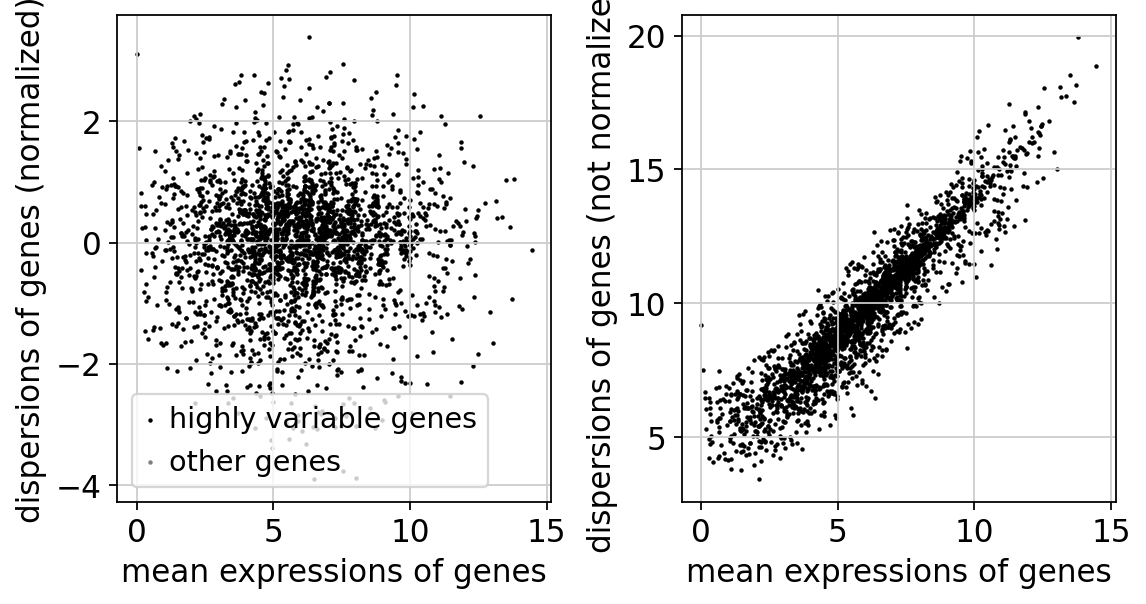

Highly variable genes found: 2538
computing PCA
    with n_comps=50
    finished (0:00:00)


/mnt/storage/mlopezdecas/Conformal Floating/conformal-ffs/.pixi/envs/default/lib/python3.13/site-packages/scanpy/preprocessing/_pca/__init__.py:384: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = x_pca


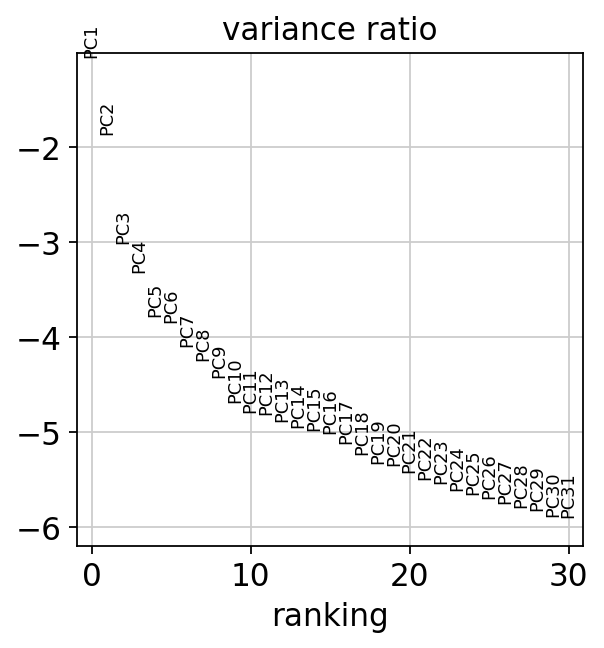

✓ PCA completed


In [50]:
# Identify highly variable genes and run PCA
print("="*50)
print("IDENTIFYING HIGHLY VARIABLE GENES & PCA")
print("="*50)

# Check for and handle any remaining NaN values
print(f"Checking for NaN values in expression data...")
n_nan = np.isnan(adata_analysis.X).sum()
print(f"NaN values found: {n_nan}")

if n_nan > 0:
    print("Replacing NaN values with 0...")
    adata_analysis.X = np.nan_to_num(adata_analysis.X, nan=0.0)

# Find highly variable genes with adjusted parameters for transcript data
sc.pp.highly_variable_genes(adata_analysis, min_mean=0.01, max_mean=5, min_disp=0.5, n_top_genes=7500)
sc.pl.highly_variable_genes(adata_analysis)
plt.show()

print(f"Highly variable genes found: {sum(adata_analysis.var.highly_variable)}")

# Keep only highly variable genes for downstream analysis
adata_analysis.raw = adata_analysis  # Save full data
adata_analysis = adata_analysis[:, adata_analysis.var.highly_variable]

# Run PCA
sc.tl.pca(adata_analysis, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_analysis, log=True, n_pcs=30)
plt.show()

print("✓ PCA completed")

UMAP VISUALIZATION - BEFORE BATCH CORRECTION
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


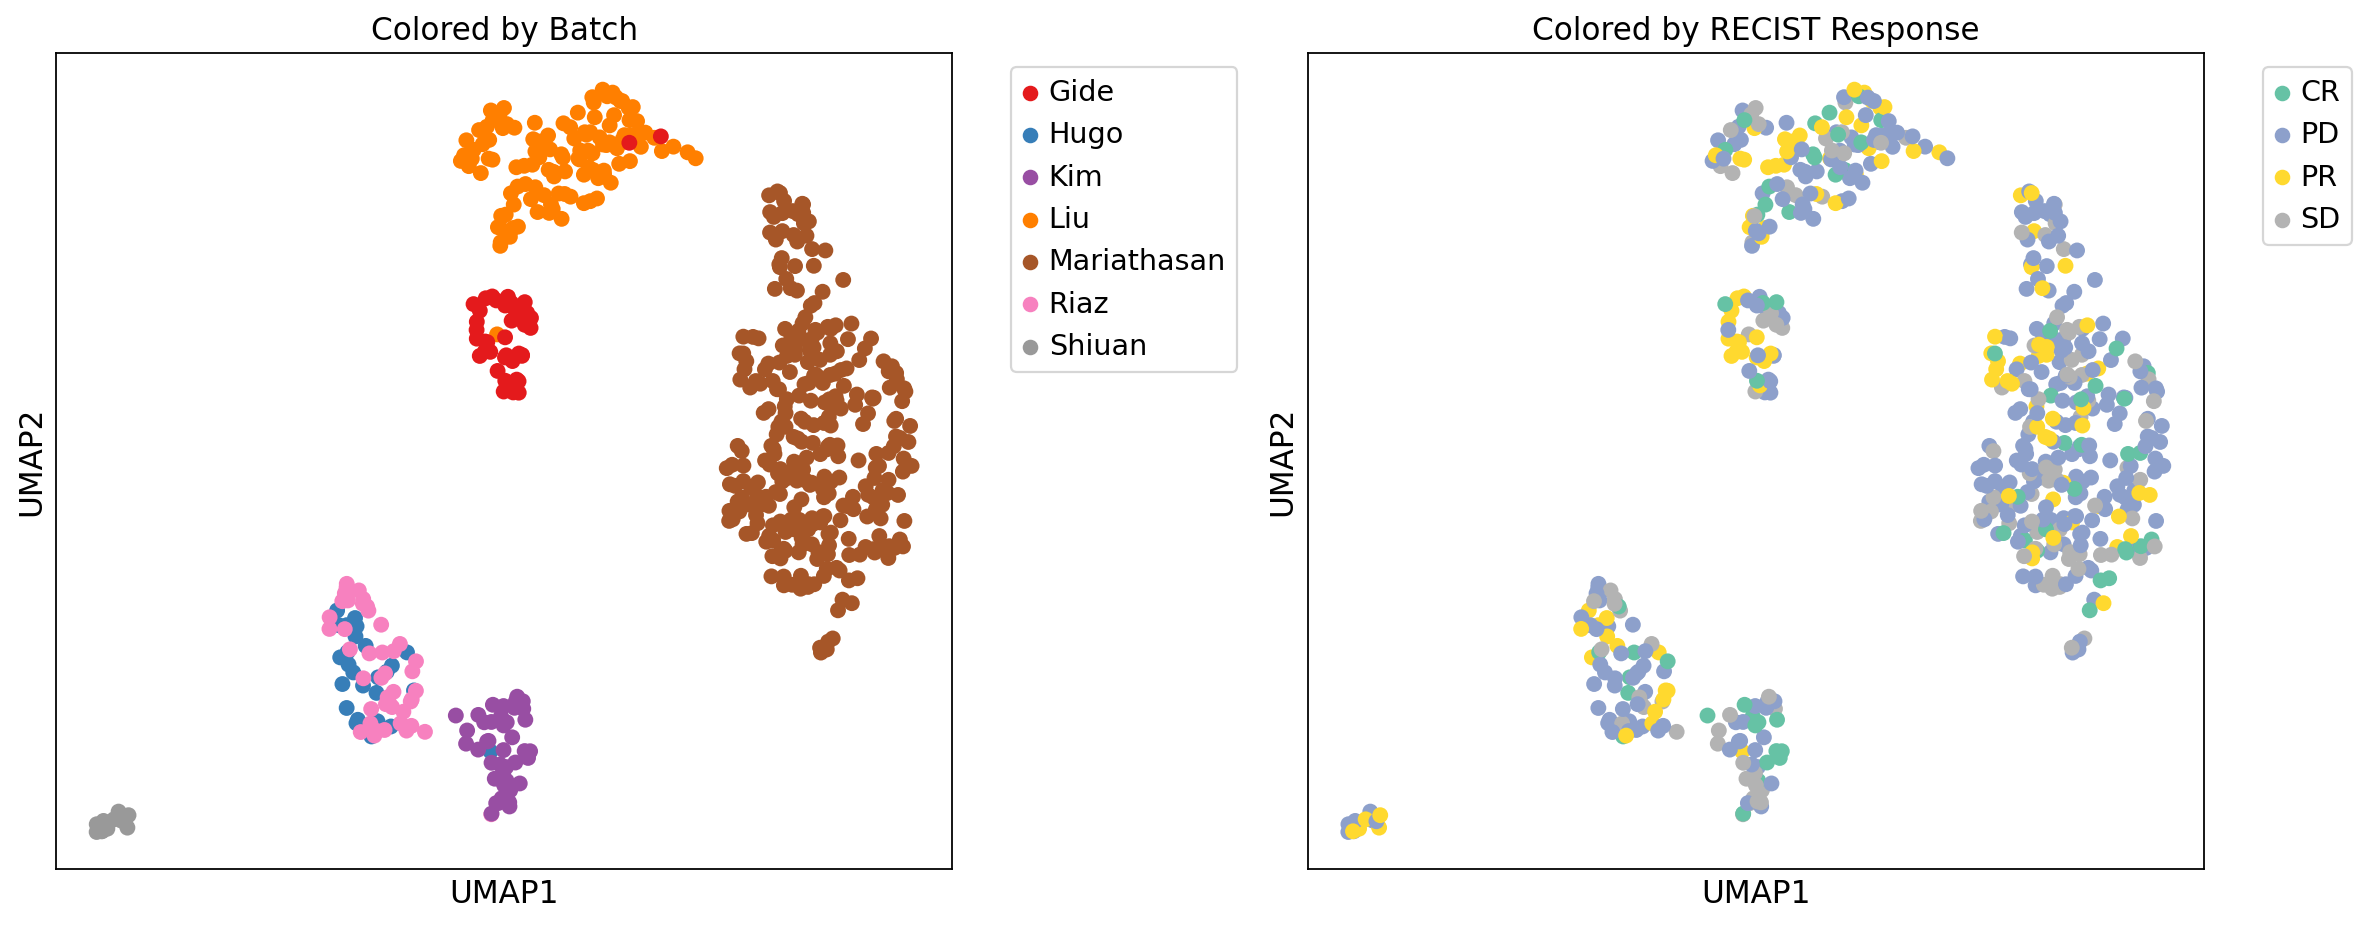

In [51]:
# Compute UMAP for visualization
print("="*50)
print("UMAP VISUALIZATION - BEFORE BATCH CORRECTION")
print("="*50)

# Compute neighborhood graph and UMAP
sc.pp.neighbors(adata_analysis, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata_analysis)

# Create subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot by batch
sc.pl.umap(adata_analysis, color='batch', palette='Set1', ax=axes[0], show=False, title='Colored by Batch')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot by RECIST response
sc.pl.umap(adata_analysis, color='recist', palette='Set2', ax=axes[1], show=False, title='Colored by RECIST Response')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



AUTOMATED CLUSTERING - BEFORE BATCH CORRECTION
running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
Number of clusters found: 9


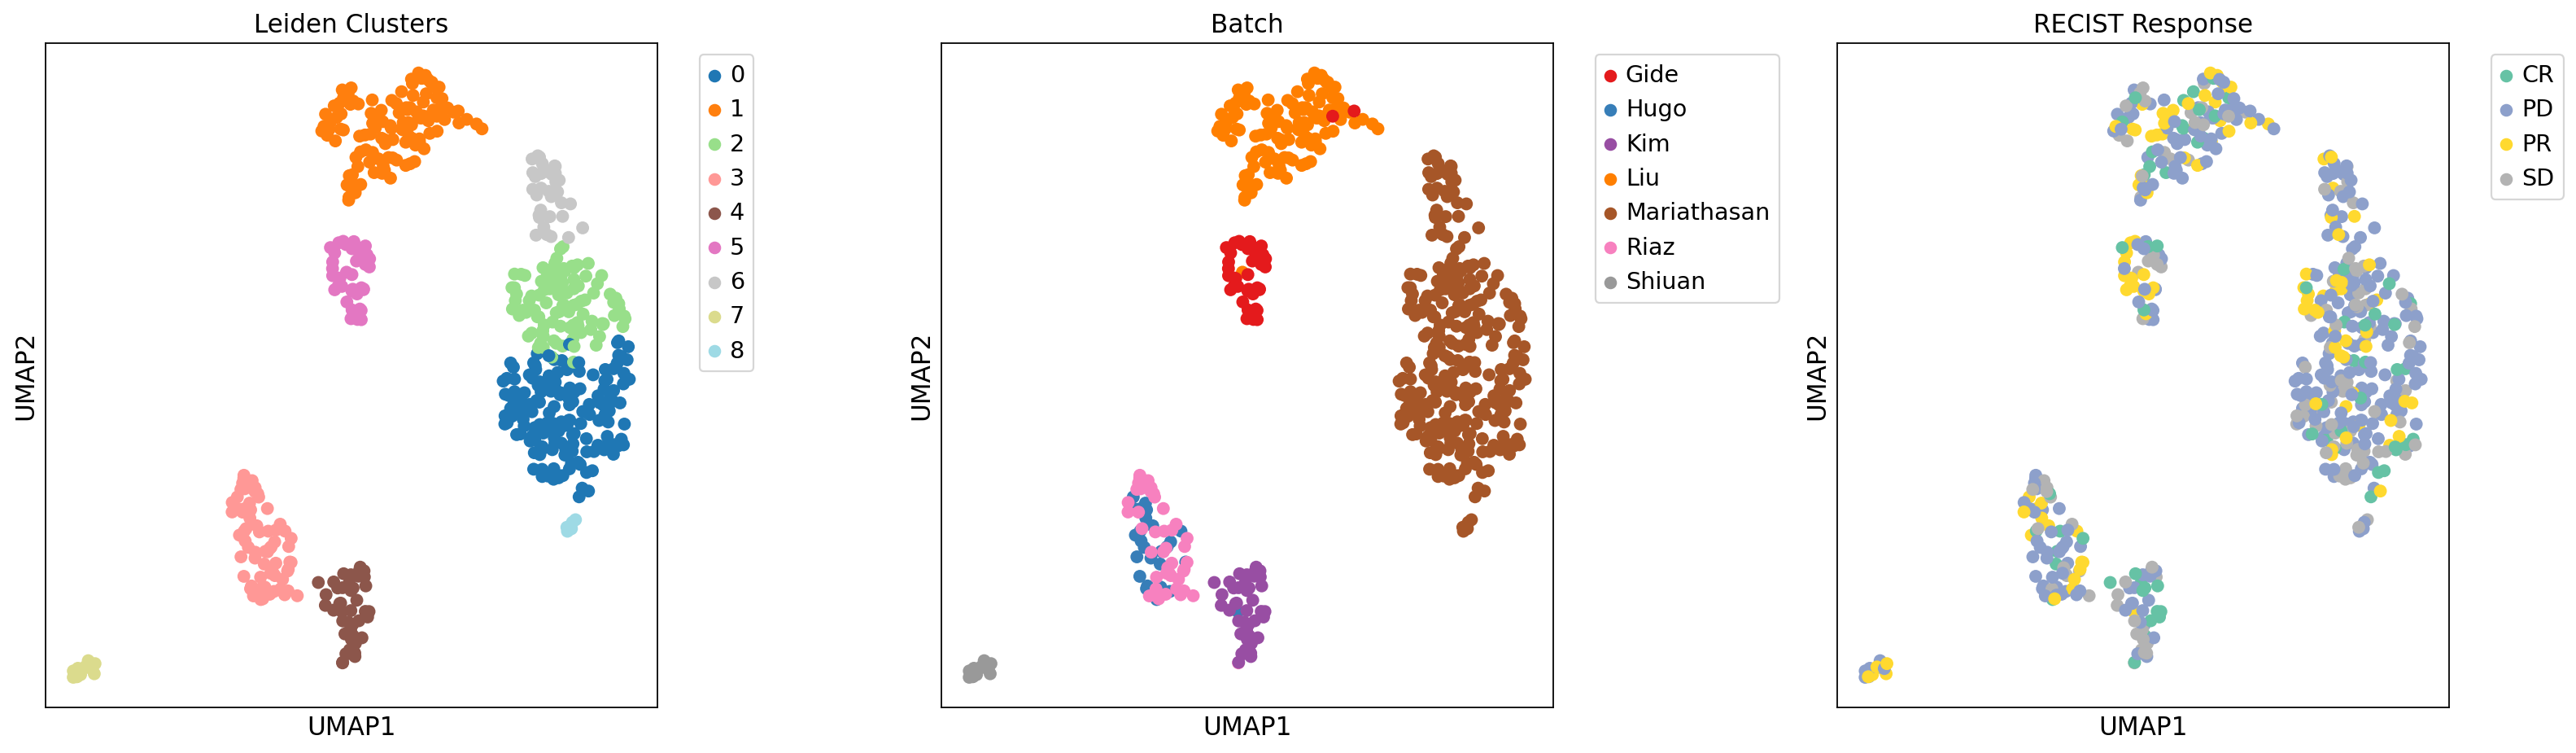


Cluster composition by batch:
batch   Gide  Hugo  Kim  Liu  Mariathasan  Riaz  Shiuan
leiden                                                 
0          0     0    0    0          158     0       0
1          2     0    0  120            0     0       0
2          0     0    0    0          101     0       0
3          0    26    0    0            0    43       0
4          0     1   45    0            0     1       0
5         39     0    0    1            0     0       0
6          0     0    0    0           33     0       0
7          0     0    0    0            0     0      13
8          0     0    0    0            6     0       0

Cluster composition by RECIST:
recist  CR  PD  PR  SD
leiden                
0       16  90  15  37
1       16  57  31  18
2        9  51  22  19
3        7  34  15  13
4       13  18   1  15
5        4  15  15   6
6        0  22   6   5
7        0   7   6   0
8        0   4   0   2


In [52]:
# Automated clustering
print("="*50)
print("AUTOMATED CLUSTERING - BEFORE BATCH CORRECTION")
print("="*50)

# Leiden clustering
sc.tl.leiden(adata_analysis, resolution=0.5)
print(f"Number of clusters found: {len(adata_analysis.obs['leiden'].unique())}")

# Visualize clusters
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot clusters
sc.pl.umap(adata_analysis, color='leiden', palette='tab20', ax=axes[0], show=False, title='Leiden Clusters')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot batch again for comparison
sc.pl.umap(adata_analysis, color='batch', palette='Set1', ax=axes[1], show=False, title='Batch')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot RECIST again for comparison
sc.pl.umap(adata_analysis, color='recist', palette='Set2', ax=axes[2], show=False, title='RECIST Response')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Analyze cluster composition
print("\nCluster composition by batch:")
cluster_batch = pd.crosstab(adata_analysis.obs['leiden'], adata_analysis.obs['batch'])
print(cluster_batch)

print("\nCluster composition by RECIST:")
cluster_recist = pd.crosstab(adata_analysis.obs['leiden'], adata_analysis.obs['recist'])
print(cluster_recist)



In [53]:


# Create a copy for Combat correction
adata_combat = adata_analysis.copy()

# Prepare data for Combat
# Combat expects data as genes x samples, so we need to transpose
data_for_combat = adata_combat.X.T  # Transpose to genes x samples
batch_labels = adata_combat.obs['batch'].values


sc.pp.combat(adata_combat, key='batch')
    



Standardizing Data across genes.

Found 7 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



/mnt/storage/mlopezdecas/Conformal Floating/conformal-ffs/.pixi/envs/default/lib/python3.13/site-packages/scanpy/preprocessing/_combat.py:344: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


In [54]:
# Recompute embeddings after batch correction
print("="*50)
print("RECOMPUTING EMBEDDINGS AFTER BATCH CORRECTION")
print("="*50)

# Recompute PCA, neighbors, and UMAP on corrected data
print("Recomputing PCA...")
sc.tl.pca(adata_combat, svd_solver='arpack')

print("Recomputing neighborhood graph...")
sc.pp.neighbors(adata_combat, n_neighbors=10, n_pcs=30)

print("Recomputing UMAP...")
sc.tl.umap(adata_combat)



RECOMPUTING EMBEDDINGS AFTER BATCH CORRECTION
Recomputing PCA...
computing PCA
    with n_comps=50
    finished (0:00:00)
Recomputing neighborhood graph...
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
Recomputing UMAP...
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


COMPARISON: BEFORE vs AFTER BATCH CORRECTION


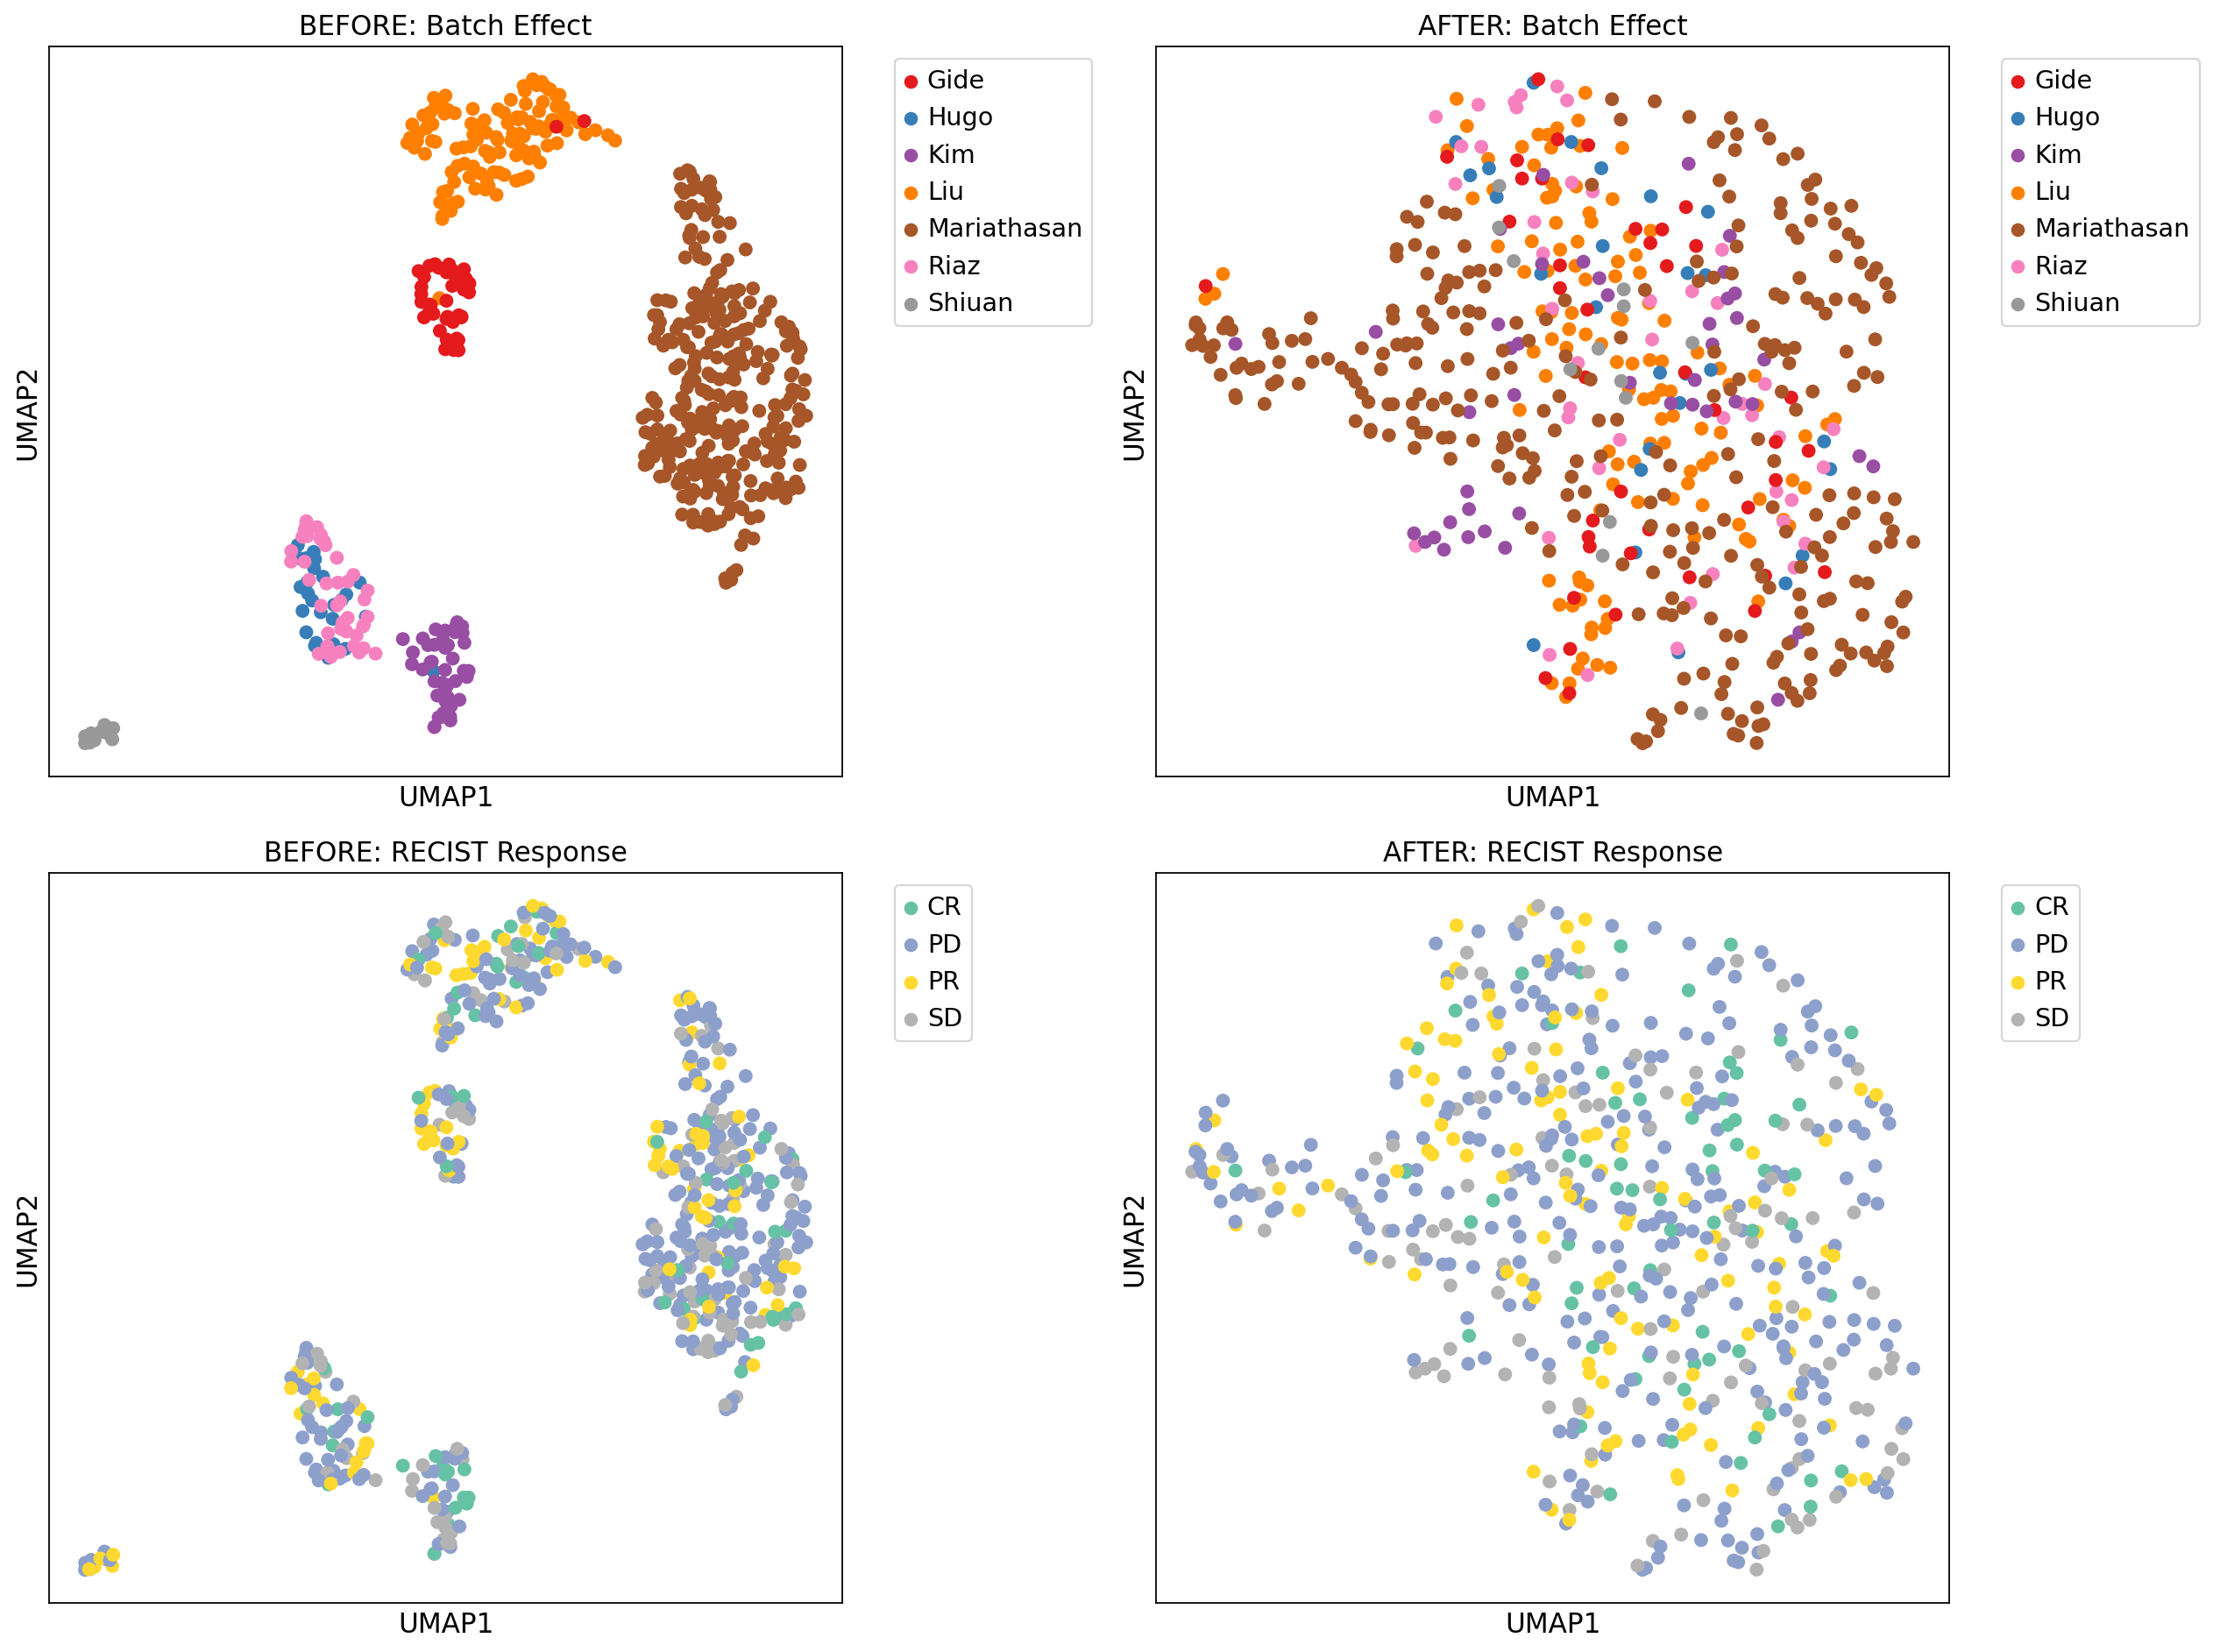

In [55]:
# Compare before and after batch correction
print("="*50)
print("COMPARISON: BEFORE vs AFTER BATCH CORRECTION")
print("="*50)

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Before correction - Batch
sc.pl.umap(adata_analysis, color='batch', palette='Set1', ax=axes[0,0], show=False, title='BEFORE: Batch Effect')
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# After correction - Batch
sc.pl.umap(adata_combat, color='batch', palette='Set1', ax=axes[0,1], show=False, title='AFTER: Batch Effect')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Before correction - RECIST
sc.pl.umap(adata_analysis, color='recist', palette='Set2', ax=axes[1,0], show=False, title='BEFORE: RECIST Response')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# After correction - RECIST
sc.pl.umap(adata_combat, color='recist', palette='Set2', ax=axes[1,1], show=False, title='AFTER: RECIST Response')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




CLUSTERING AFTER BATCH CORRECTION
running Leiden clustering
    finished: found 7 clusters and added
    'leiden_corrected', the cluster labels (adata.obs, categorical) (0:00:00)
Number of clusters after correction: 7


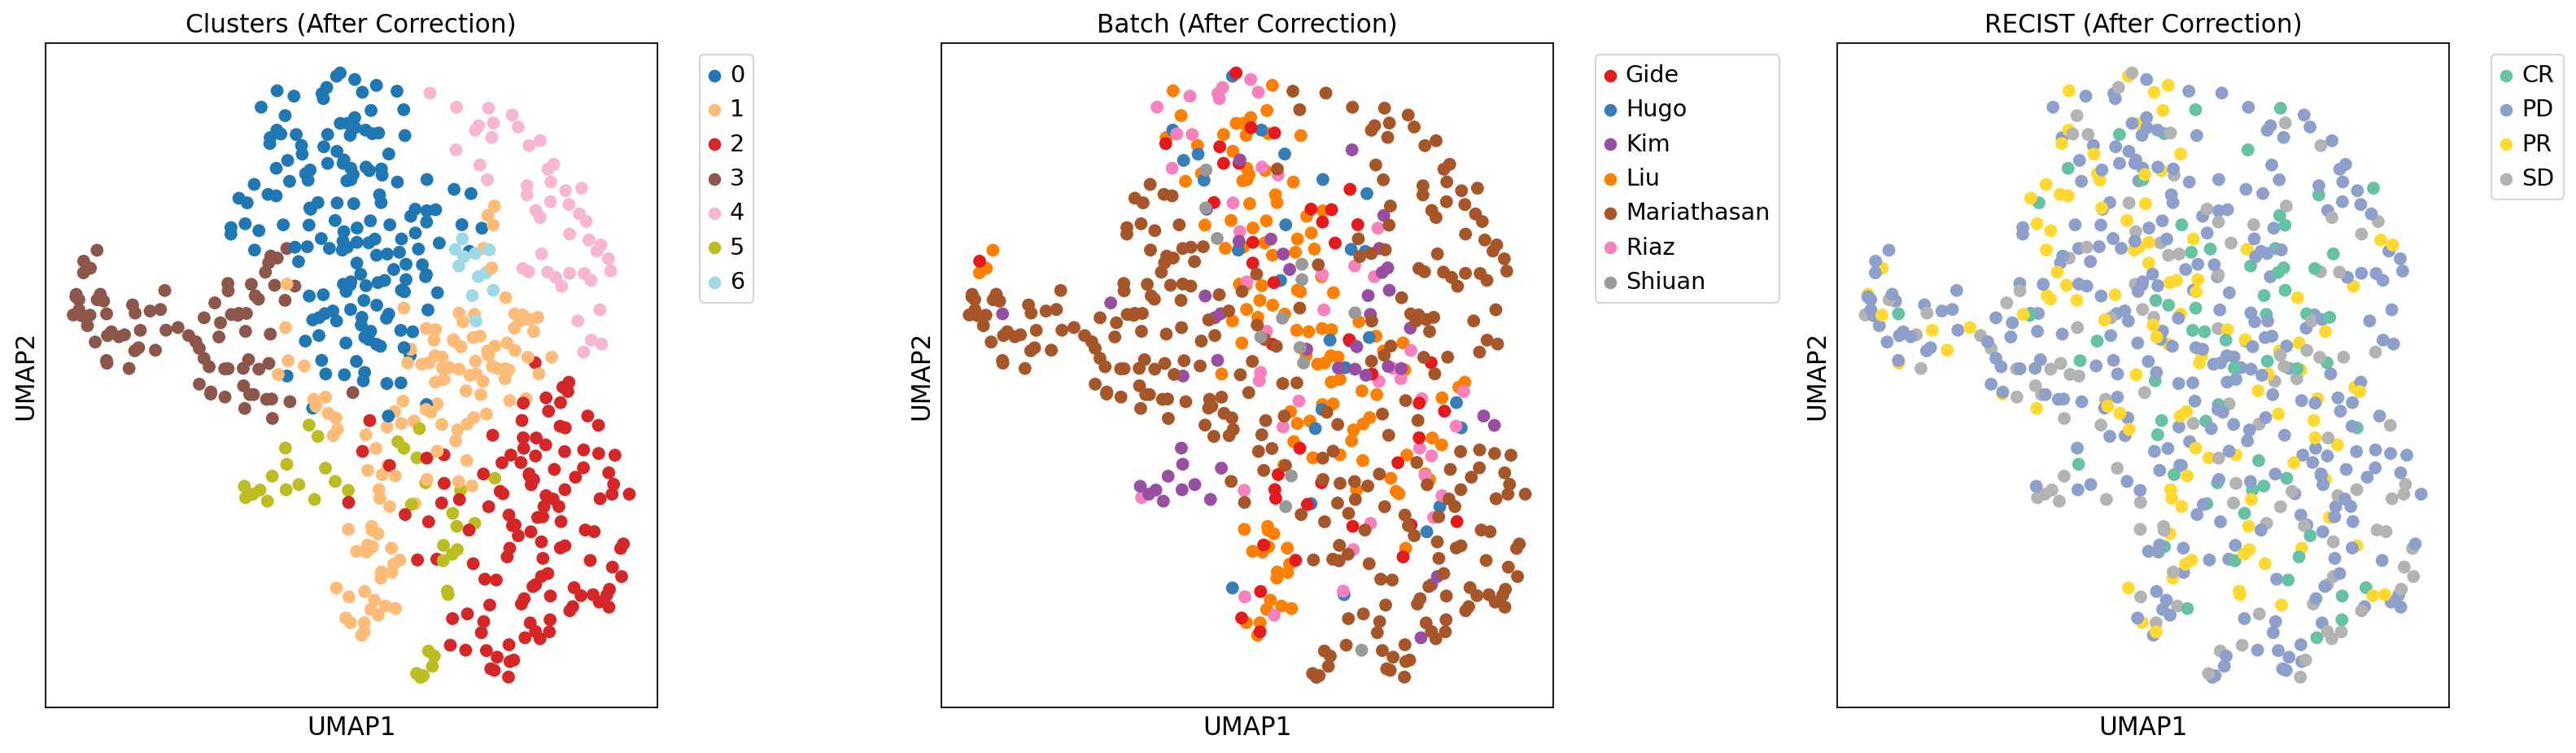


Cluster composition after correction:
By batch:
batch             Gide  Hugo  Kim  Liu  Mariathasan  Riaz  Shiuan
leiden_corrected                                                 
0                   18    13   11   58           34    21       8
1                   10     7   12   44           39     9       4
2                    8     4    5   12           85     7       1
3                    1     0    2    3           76     0       0
4                    0     0    1    0           46     0       0
5                    4     2   11    4           13     5       0
6                    0     1    3    0            5     2       0

By RECIST:
recist            CR  PD  PR  SD
leiden_corrected                
0                 16  82  42  23
1                 21  54  27  23
2                 10  64  16  32
3                  2  47  15  18
4                  6  30   3   8
5                  6  15   7  11
6                  4   6   1   0

BATCH EFFECT ASSESSMENT
Batch separation (silho

In [56]:
# Final clustering after batch correction
print("="*50)
print("CLUSTERING AFTER BATCH CORRECTION")
print("="*50)

# Leiden clustering on corrected data
sc.tl.leiden(adata_combat, resolution=0.5, key_added='leiden_corrected')
print(f"Number of clusters after correction: {len(adata_combat.obs['leiden_corrected'].unique())}")

# Visualize corrected clustering
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot clusters after correction
sc.pl.umap(adata_combat, color='leiden_corrected', palette='tab20', ax=axes[0], show=False, title='Clusters (After Correction)')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot batch (should be more integrated)
sc.pl.umap(adata_combat, color='batch', palette='Set1', ax=axes[1], show=False, title='Batch (After Correction)')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot RECIST (biological signal should be preserved)
sc.pl.umap(adata_combat, color='recist', palette='Set2', ax=axes[2], show=False, title='RECIST (After Correction)')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Analyze new cluster composition
print("\nCluster composition after correction:")
print("By batch:")
cluster_batch_corrected = pd.crosstab(adata_combat.obs['leiden_corrected'], adata_combat.obs['batch'])
print(cluster_batch_corrected)

print("\nBy RECIST:")
cluster_recist_corrected = pd.crosstab(adata_combat.obs['leiden_corrected'], adata_combat.obs['recist'])
print(cluster_recist_corrected)

# Calculate batch mixing metrics
print("\n" + "="*50)
print("BATCH EFFECT ASSESSMENT")
print("="*50)

# Simple batch mixing assessment
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score

# Calculate silhouette score for batch separation (lower is better for integration)
batch_labels_numeric = pd.Categorical(adata_combat.obs['batch']).codes
sil_score_after = silhouette_score(adata_combat.obsm['X_umap'], batch_labels_numeric)

batch_labels_numeric_before = pd.Categorical(adata_analysis.obs['batch']).codes
sil_score_before = silhouette_score(adata_analysis.obsm['X_umap'], batch_labels_numeric_before)

print(f"Batch separation (silhouette score):")
print(f"  Before correction: {sil_score_before:.3f}")
print(f"  After correction:  {sil_score_after:.3f}")
print(f"  Change: {sil_score_after - sil_score_before:.3f} (negative is good)")




In [57]:
print("="*50)
print("SAVING BATCH CORRECTED DATA")
print("="*50)

# Combine expression data with clinical metadata
expression_data = pd.DataFrame(
    adata_combat.X, 
    index=adata_combat.obs_names, 
    columns=adata_combat.var_names
)

# Combine with clinical data
combined_data = pd.concat([adata_combat.obs[['recist']], expression_data], axis=1)

# Save to CSV
output_file = f"../../data/data_processed/recist_pancancer_{comb_to_append}_card_{cardinality_selected}.csv"
combined_data.to_csv(output_file, index=True)

#(f"✓ Batch corrected data saved to: {output_file}")
print(f"Data shape: {combined_data.shape}")
print(f"Columns: {len(adata_combat.obs.columns)} clinical + {len(adata_combat.var_names)} genes")
print(f"Patients: {len(combined_data)}")
print(f"File size: ~{combined_data.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB")

SAVING BATCH CORRECTED DATA


Data shape: (589, 2539)
Columns: 144 clinical + 2538 genes
Patients: 589
File size: ~11.5 MB


In [58]:
combined_data

,recist,ENSG00000000938.13,ENSG00000000971.17,ENSG00000002549.13,ENSG00000002586.20,ENSG00000002587.10,ENSG00000002746.15,ENSG00000003402.21,ENSG00000003436.16,ENSG00000004468.13,...,ENSG00000254087.8,ENSG00000254415.4,ENSG00000254772.10,ENSG00000256683.7,ENSG00000258227.7,ENSG00000259207.9,ENSG00000261857.7,ENSG00000262246.6,ENSG00000269190.6,ENSG00000269404.7
Liu_Patient100,PR,3.849549,5.864285,6.569854,7.184665,0.152007,-1.059065,5.954929,3.414605,4.409543,...,4.290360,3.911963,8.005748,2.983436,1.490804,3.762272,1.139249,1.102734,-0.773220,0.373180
Liu_Patient102,SD,2.066176,4.929214,5.417174,6.939044,0.421643,0.856785,5.084060,3.160377,0.822722,...,2.795386,2.051531,8.316398,3.247767,1.608312,5.506331,2.124151,0.408114,0.264365,-7.172331
Liu_Patient105,SD,-0.494703,2.969173,4.499897,6.434339,0.277439,-2.122894,4.377468,0.366212,0.075566,...,2.428623,-0.196926,9.207538,3.084114,-2.072428,2.787917,3.144788,-0.750932,-1.944821,-7.172331
Liu_Patient106,CR,2.412715,5.381408,5.776678,6.960347,-0.369882,-0.467703,4.907614,3.033885,2.255653,...,3.354595,1.542928,8.767155,2.281298,0.618612,1.848242,0.817380,-0.025323,0.050771,-3.220239
Liu_Patient107,PR,-6.011522,-5.365678,4.833526,2.881777,-5.753014,-7.441041,3.459537,-5.529066,-7.561355,...,-5.794778,-7.290521,9.002753,-4.808627,-6.034573,4.217203,5.017920,0.579170,-7.555864,-7.172331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Shiuan_P31,PR,2.451236,2.368708,6.055442,5.799182,-1.746348,-6.311844,5.720631,4.301383,-2.051222,...,1.773429,1.116867,9.620228,2.942464,1.496562,3.711115,-4.061820,-1.024698,0.528223,-1.115812
Shiuan_P36,PD,1.415437,6.551603,5.607782,7.128548,0.338736,-3.244786,5.750680,-0.718175,0.844335,...,3.625553,-9.598129,8.480498,3.064128,-0.143557,3.058370,3.097447,-0.440930,-2.265715,-0.283922
Shiuan_P42,PR,2.214347,6.402294,5.465468,6.800154,1.229123,-3.708439,5.111142,2.359633,1.623201,...,3.097413,0.647110,8.862065,1.790260,2.131341,3.025334,2.438645,-0.103038,0.132779,-2.329704
Shiuan_P55,PD,1.047999,6.825646,4.218670,7.560481,0.853249,-4.661504,4.114113,0.142603,-0.527833,...,2.347240,-0.304881,8.304896,2.482489,-0.120276,4.235073,3.611378,0.077173,-3.735115,-1.704619
